# TIME SERIES
## STATS MODELS 
https://www.statsmodels.org

Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [1]:
# Example taken from https://predictivehacks.com/arima-model-in-python/
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
# File url
url = 'https://raw.githubusercontent.com/E-man85/ML-PY/main/03-data/air_passengers.csv'
# Read directly from GitHub with pandas
airline = pd.read_csv(url, index_col='TravelDate', parse_dates = True) # parse_dates = True parse the date columns and convert them to pandas date type (datetime64).
# Show first 5 rows of dataframe
airline.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot: xlabel='TravelDate'>

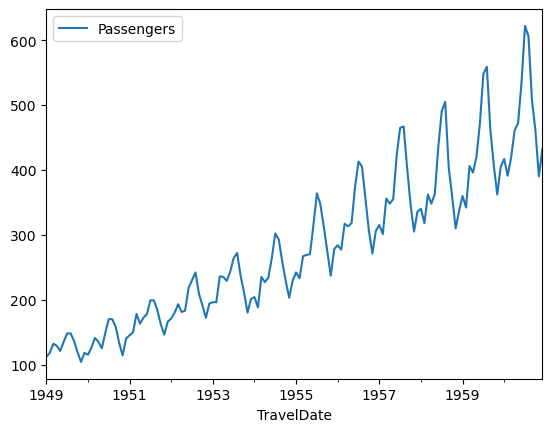

In [2]:
# plot
airline.plot()

### ETS decomposition (Error, Trend, Seasonality)

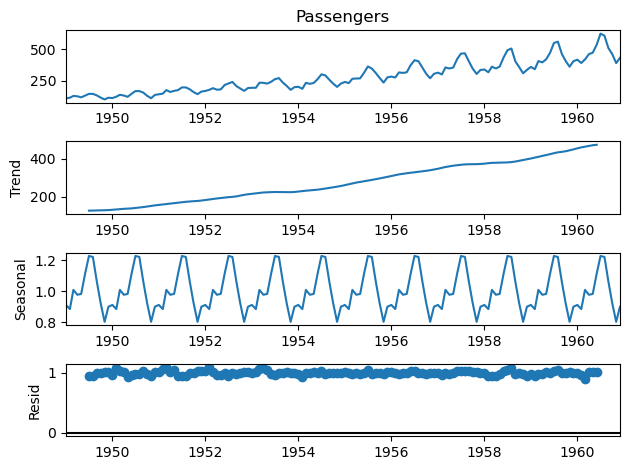

In [3]:
result = seasonal_decompose(airline['Passengers'], model ='multiplicative')
# ETS plot
result.plot();

### Stationary or non-stationary series?
#### Augmented Dickey-Fuller test -> p-value below 0.05

The test returns a tuple with the following values, in this order:

- ADF test value
- p-value
- used lags
- Number of observations used in the test
- A dictionary of critical values ​​for statistical testing
- Value of the Schwarz Information Criterion (BIC) maximized

In [4]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(airline['Passengers'])
# assigning names to each of the output variables
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical', 'values', 'icbest'],result))

{'adf': 0.8153688792060502,
 'pvalue': 0.991880243437641,
 'usedlag': 13,
 'nobs': 130,
 'critical': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'values': 996.692930839019}

However, with a p-value of approximately 0.992, there is not enough evidence to reject the null hypothesis that the time series has a root unit. 

In other words, based on this p-value, the series appears to be non-stationary.

### Convert non-stationary to stationary using differences (parameters d and D)

<AxesSubplot: xlabel='TravelDate'>

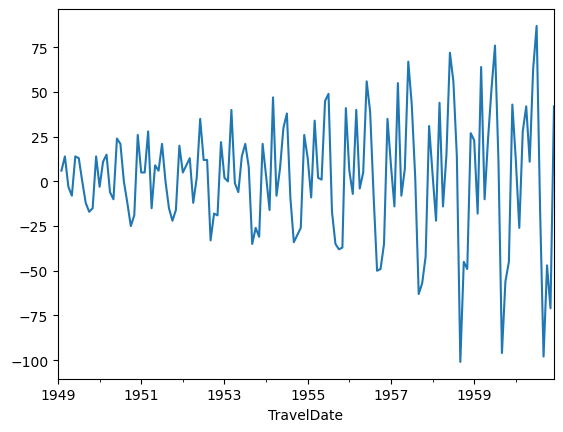

In [5]:
airline['1difference']=airline['Passengers']-airline['Passengers'].shift(1)
airline['1difference'].plot()

### Retest Augmented Dickey-Fuller -> p-value below 0.05

In [6]:
# notice that we are discarding the value nan
result=adfuller(airline['1difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -2.829266824170006,
 'pvalue': 0.05421329028382468,
 'usedlag': 12,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 988.5069317854084}

### Repeat the differences for the 2nd differences

<AxesSubplot: xlabel='TravelDate'>

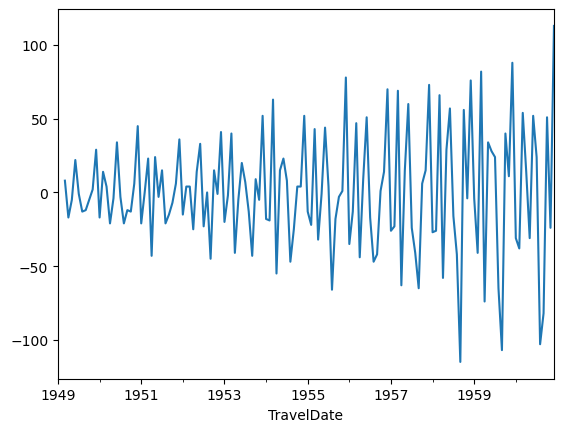

In [7]:
airline['2difference']=airline['1difference']-airline['1difference'].shift(1)
airline['2difference'].plot()

### Retest Augmented Dickey-Fuller -> p-value below 0.05 -> d=2

In [8]:
result=adfuller((airline['2difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -16.384231542468527,
 'pvalue': 2.732891850014085e-29,
 'usedlag': 11,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 988.6020417275605}

### Now the series is seasonal, it is necessary to calculate the parameter D

Create a new column in the airline DataFrame called 'Seasonal_Difference'. 

This column stores the difference between the values ​​in the 'Passengers' column and the values ​​in the same column, but shifted by 12 positions.

It is common to use in time series to remove seasonality, especially when the seasonality is yearly and the data are monthly (hence the 12-month offset).

Is a valuable technique when dealing with time series that show seasonal patterns. After this transformation, the series can become more stationary, which is often desirable when applying time series forecasting models.

<AxesSubplot: xlabel='TravelDate'>

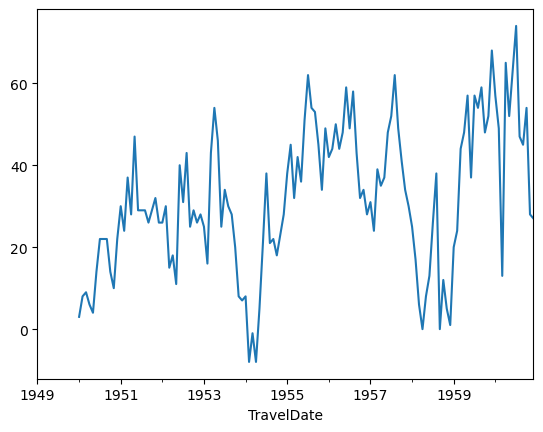

In [9]:
airline['Seasonal_Difference']=airline['Passengers']-airline['Passengers'].shift(12)
airline['Seasonal_Difference'].plot()

### Retest Augmented Dickey-Fuller -> p-value below 0.05 -> D=0

In [10]:
result=adfuller((airline['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -3.3830207264924805,
 'pvalue': 0.011551493085514982,
 'usedlag': 1,
 'nobs': 130,
 'criticalvalues': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 'icbest': 919.527129208137}

### Autocorrelation and Partial Autocorrelation Plots (p,q and P,Q parameters)

ACF (Autocorrelation Function): 
- Measures the correlation between the time series and a shifted version of itself.

PACF (Partial Autocorrelation Function): 
- Measures the correlation between the time series and a shifted version of itself, but after subtracting the correlations due to intermediate terms.

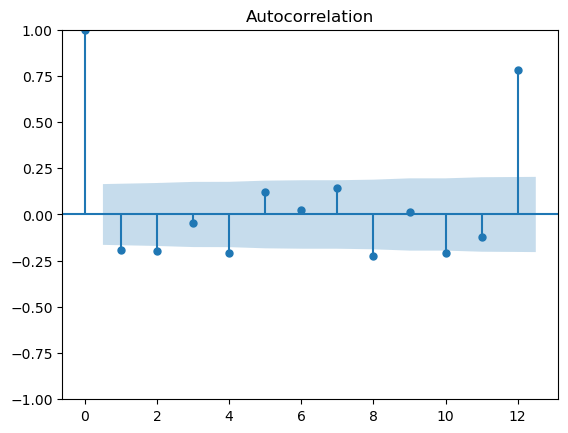

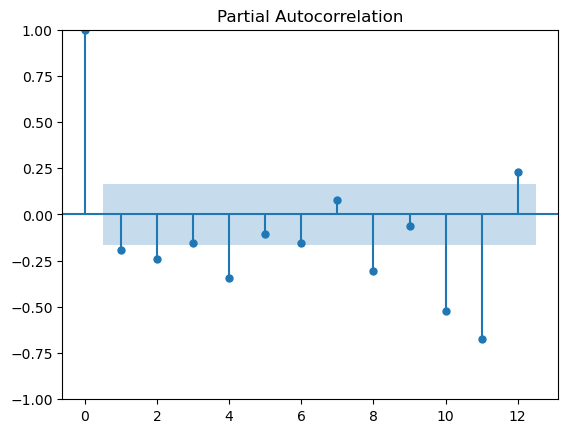

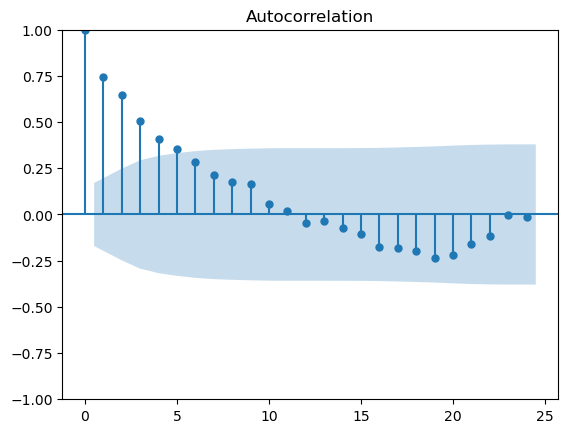

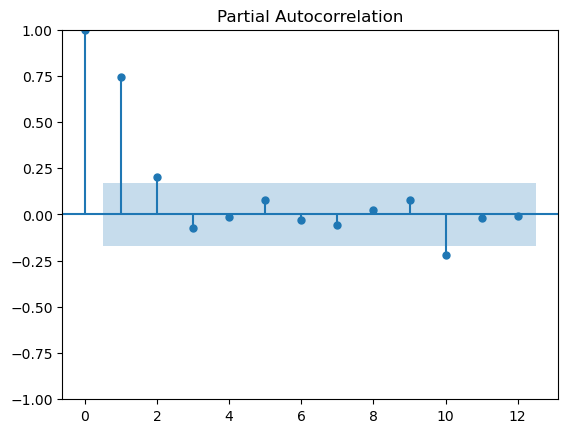

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(airline['2difference'].dropna(), lags=12);
plot_pacf(airline['2difference'].dropna(), lags =12, method='ywm') ;
plot_acf(airline['Seasonal_Difference'].dropna(), lags=24) ;
plot_pacf(airline['Seasonal_Difference'].dropna(), lags = 12, method='ywm');

### Create model ARIMA AR-Autoregression I-Integrated MA-Moving Average

c:\Users\Egomes\anaconda3\envs\mlearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Egomes\anaconda3\envs\mlearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot: ylabel='Density'>

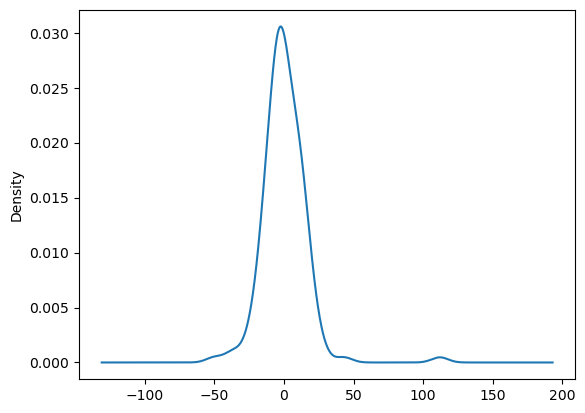

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(airline['Passengers'],
              order=(1,2,1),
              seasonal_order=(1, 0, 0, 12))

result=model.fit()
result.summary() # https://analyzingalpha.com/interpret-arima-results

result.resid.plot(kind='kde')

### Create empty dataframe with new dates for new forecasts

In [13]:
from pandas.tseries.offsets import DateOffset
new_dates=[airline.index[-1]+DateOffset(months=x) for x in range(1,48)]
df_pred=pd.DataFrame(index=new_dates,columns =airline.columns)
df_pred.head()

,Passengers,1difference,2difference,Seasonal_Difference
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN


### Generate new forecasts for final dataframe

<AxesSubplot: >

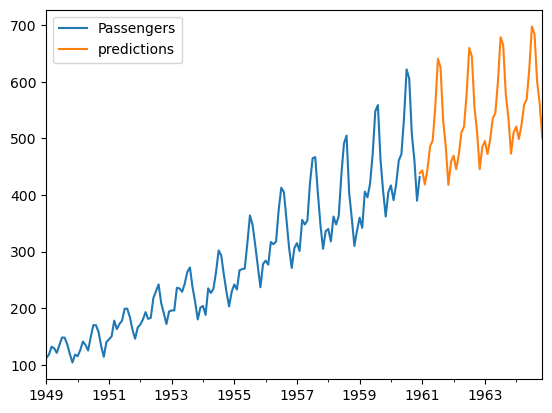

In [14]:
df2=pd.concat([airline,df_pred])
df2['predictions']=result.predict(start=143,end=191)
df2[['Passengers','predictions']].plot()

### Example taken from https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

In [15]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
# File url
url = 'https://raw.githubusercontent.com/E-man85/ML-PY/main/03-data/air_passengers.csv'
# Read directly from GitHub with pandas
airline = pd.read_csv(url, index_col='TravelDate', parse_dates = True) # parse_dates = True parse the date columns and convert them to pandas date type (datetime64).

### Explore dataframe

In [16]:
airline.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<AxesSubplot: xlabel='TravelDate'>

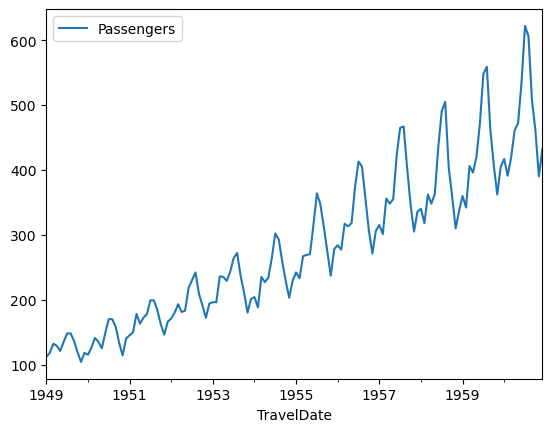

In [18]:
airline.plot()

### ETS (Error, Trend, Seasonality)

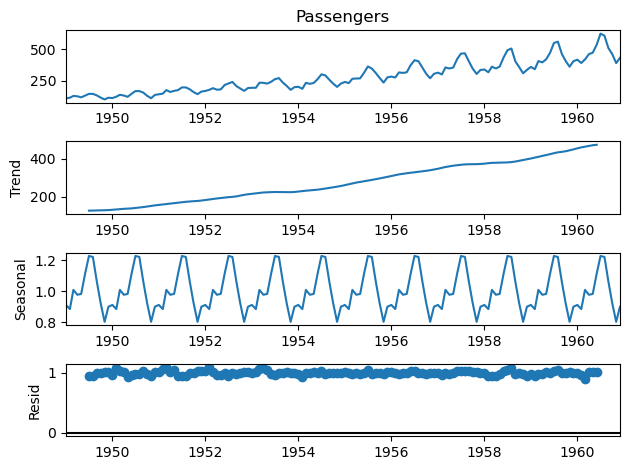

In [19]:
result = seasonal_decompose(airline['Passengers'], model ='multiplicative')
# ETS plot
result.plot();

### Auto-ARIMA Model

In [20]:
from pmdarima import auto_arima
# adjust auto_arima function to dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore',   # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		  # set to stepwise
# print adjustment report
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.23 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.07 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 15 Aug 2023   AIC                           1019.178
Time:                                     17:59:56   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split into training and test dataset

In [21]:
train = airline.iloc[:len(airline)-12] # remove the last 12 months from the dataset
test = airline.iloc[len(airline)-12:]  # 12 months for test dataset

### Fit SARIMAX(0, 1, 1)x(2, 1, 1, 12) to the training dataset

c:\Users\Egomes\anaconda3\envs\mlearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Egomes\anaconda3\envs\mlearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot: ylabel='Density'>

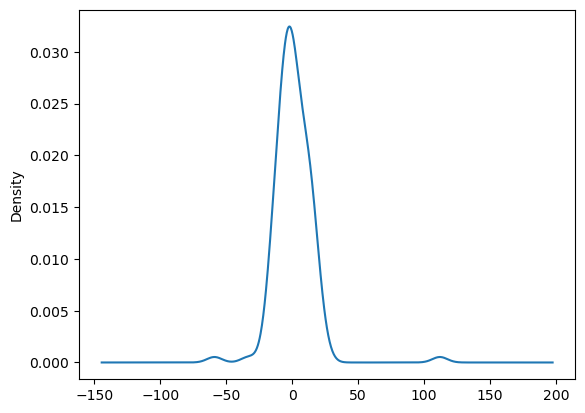

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Passengers'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 0, 12))
result = model.fit()
result.summary()
result.resid.plot(kind='kde')

### Calculate predictions with ARIMA model and compare with test dataset

In [23]:
start = len(train)
end = len(train) + len(test) - 1
# one-year forecasts against test dataset
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

### Plot predictions and actual values ​​from the test dataset

<AxesSubplot: xlabel='TravelDate'>

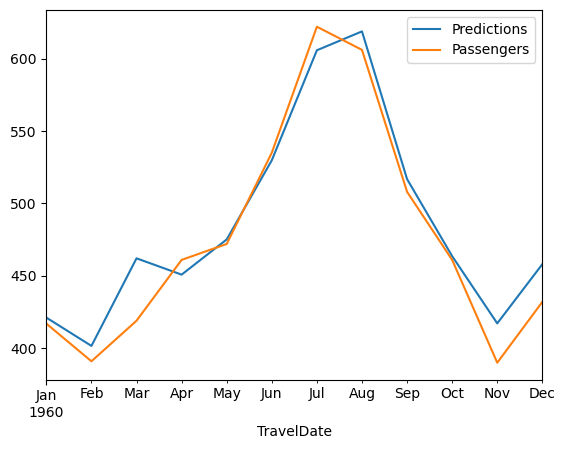

In [24]:
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

### Evaluate the model with MSE and RMSE

In [25]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# calcular root mean squared error
print(f'RMSE:\n',rmse(test["Passengers"], predictions))
# calcular mean squared error
print(f'MSE:\n',mean_squared_error(test["Passengers"], predictions))

RMSE:
 18.38077753006356
MSE:
 337.8529826096895


### Calculate new forecasts as ARIMA model

In [26]:
# train the model with the entire dataset
model = model = SARIMAX(airline['Passengers'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 0, 12))
result = model.fit()
result.summary() 

c:\Users\Egomes\anaconda3\envs\mlearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Egomes\anaconda3\envs\mlearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 15 Aug 2023   AIC                           1019.178
Time:                                     17:59:57   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Calculate new forecasts for the next 4 years

<AxesSubplot: xlabel='TravelDate'>

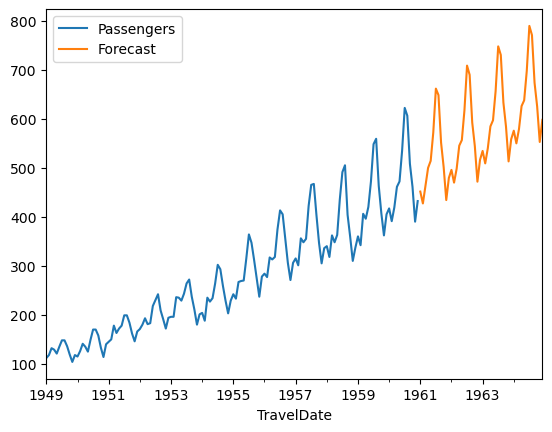

In [27]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 4 * 12,
						typ = 'levels').rename('Forecast')

# plot forecasts
airline['Passengers'].plot(legend = True)
forecast.plot(legend = True)